In [2]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets

In [3]:
# Load the wine dataset
dataset = sklearn.datasets.load_wine()
dataframe_X = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
dataframe_y = pd.DataFrame(data=1 - (dataset['target']), columns=['target'])
dataframe_raw = pd.concat([dataframe_X, dataframe_y], axis=1)
# Shuffle dataset
rng = np.random.default_rng(0)
Xy_df = dataframe_raw.iloc[rng.permutation(len(dataframe_raw))].reset_index(drop=True)

display(Xy_df)
dataframe_raw.info()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,-1
1,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.050000,0.79,3.08,520.0,0
2,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.600000,0.59,1.30,500.0,-1
3,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.050000,0.96,2.06,495.0,0
4,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.300000,1.42,2.83,406.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.950000,1.05,1.82,520.0,0
174,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.700000,1.04,3.59,1035.0,1
175,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,-1
176,13.76,1.53,2.70,19.5,132.0,2.95,2.74,0.50,1.35,5.400000,1.25,3.00,1235.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [7]:
# prepare NumPy ndarrays
X = np.array(Xy_df[dataset['feature_names'][0:2]]) # we only use the first two columns
y = np.array(Xy_df['target'])

training_points = 100
testing_points = 78

# Split the data into training/new data
X_training = X[:training_points]
X_testing = X[training_points:training_points+testing_points]

# Split the targets into training/new data
y_training = y[:training_points]
y_true = y[training_points:training_points+testing_points]

In [8]:
# Create linear regression object
obj = sklearn.linear_model.LogisticRegression()

# Train the model using the training sets
obj.fit(X_training, y_training)

# Make predictions using the testing set
y_pred = obj.predict(X_testing)

# The parameters
theta = obj.coef_

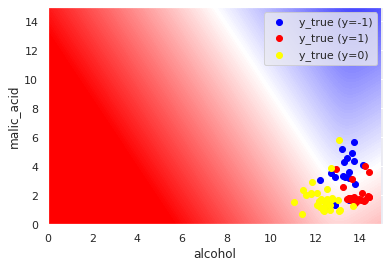

In [9]:
# Plot outputs

xrange = [0, 15]
yrange = [0, 15]
step = 0.1
x = np.arange(xrange[0], xrange[1], step)
y = np.arange(yrange[0], yrange[1], step)
xx, yy = np.meshgrid(x, y)
z = - scipy.special.logit(obj.predict_proba(np.c_[xx.reshape([-1]), yy.reshape([-1])])[:, 0].reshape(xx.shape))
plt.contourf(xx, yy, z, cmap='bwr', vmin=-20.0, vmax=20.0, levels=200)

X_new_neg = X_testing[y_true==-1, :]
X_new_pos = X_testing[y_true==1, :]
X_new_zero = X_testing[y_true==0, :]
plt.scatter(X_new_neg[:, 0], X_new_neg[:, 1],  color='blue', label='y_true (y=-1)')
plt.scatter(X_new_pos[:, 0], X_new_pos[:, 1],  color='red', label='y_true (y=1)')
plt.scatter(X_new_zero[:, 0], X_new_zero[:, 1],  color='yellow', label='y_true (y=0)')


plt.xlim(xrange)
plt.ylim(yrange)

plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])

plt.legend()

plt.show()

In [10]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_true, y_pred)))
# Confusion matrix
print('Confusion matrix: ', sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'))
# Visualize the confusion matrix
#sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'), ['benign', 'malignant'])
#plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_true, y_pred))

Accuracy: 0.7949
Confusion matrix:  [[0.16666667 0.03846154 0.02564103]
 [0.02564103 0.34615385 0.05128205]
 [0.06410256 0.         0.28205128]]
              precision    recall  f1-score   support

          -1       0.65      0.72      0.68        18
           0       0.90      0.82      0.86        33
           1       0.79      0.81      0.80        27

    accuracy                           0.79        78
   macro avg       0.78      0.79      0.78        78
weighted avg       0.80      0.79      0.80        78



In [11]:
import sklearn.svm 
# Create support vector classifier object
obj = sklearn.svm.SVC()

# Train the model using the training sets
obj.fit(X_training, y_training)

# Make predictions using the testing set
y_pred = obj.predict(X_testing)

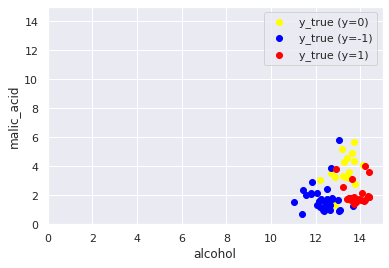

In [12]:
# Plot outputs

xrange = [0, 15]
yrange = [0, 15]
step = 0.1
x = np.arange(xrange[0], xrange[1], step)
y = np.arange(yrange[0], yrange[1], step)
xx, yy = np.meshgrid(x, y)
obj.set_params(decision_function_shape='ovo')
#z = obj.decision_function(np.c_[xx.reshape([-1]), yy.reshape([-1])]).reshape(xx.shape)
#plt.contourf(xx, yy, z, cmap='bwr', vmin=-10.0, vmax=10.0, levels=120)

X_new_neg = X_testing[y_true==0, :]
X_new_pos = X_testing[y_true==1, :]
X_new_zero = X_testing[y_true==-1, :]
plt.scatter(X_new_zero[:, 0], X_new_zero[:, 1],  color='yellow', label='y_true (y=0)')
plt.scatter(X_new_neg[:, 0], X_new_neg[:, 1],  color='blue', label='y_true (y=-1)')
plt.scatter(X_new_pos[:, 0], X_new_pos[:, 1],  color='red', label='y_true (y=1)')

plt.xlim(xrange)
plt.ylim(yrange)

plt.xlabel(dataset['feature_names'][0])
plt.ylabel(dataset['feature_names'][1])

plt.legend()

plt.show()


In [13]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_true, y_pred)))
# Confusion matrix
print('Confusion matrix: ', sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'))
# Visualize the confusion matrix
#sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'), ['benign', 'malignant']).plot(cmap=plt.cm.Blues)
#plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_true, y_pred))

Accuracy: 0.8333
Confusion matrix:  [[0.16666667 0.03846154 0.02564103]
 [0.02564103 0.37179487 0.02564103]
 [0.05128205 0.         0.29487179]]
              precision    recall  f1-score   support

          -1       0.68      0.72      0.70        18
           0       0.91      0.88      0.89        33
           1       0.85      0.85      0.85        27

    accuracy                           0.83        78
   macro avg       0.81      0.82      0.82        78
weighted avg       0.84      0.83      0.83        78



In [14]:
#from sklearn.neighbors import KNeighborsClassifier
#logreg = KNeighborsClassifier(n_neighbors=4)
#logreg.fit(X_train, y_train)
#logreg.score(X_test, y_test)

from sklearn.neighbors import KNeighborsClassifier
# Create support vector classifier object
obj = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training sets
obj.fit(X_training, y_training)

# Make predictions using the testing set
y_pred = obj.predict(X_testing)



In [15]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_true, y_pred)))
# Confusion matrix
print('Confusion matrix: ', sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'))
# Visualize the confusion matrix
#sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all'), ['benign', 'malignant']).plot(cmap=plt.cm.Blues)
#plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_true, y_pred))

Accuracy: 0.7949
Confusion matrix:  [[0.17948718 0.02564103 0.02564103]
 [0.03846154 0.33333333 0.05128205]
 [0.06410256 0.         0.28205128]]
              precision    recall  f1-score   support

          -1       0.64      0.78      0.70        18
           0       0.93      0.79      0.85        33
           1       0.79      0.81      0.80        27

    accuracy                           0.79        78
   macro avg       0.78      0.79      0.78        78
weighted avg       0.81      0.79      0.80        78

